In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('customer_purchase_data.csv')

# Basic EDA

In [12]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [14]:
df.tail()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1
1499,50,0,52625.665974,13,0,25.348017,1,4,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [18]:
df.shape

(1500, 9)

In [20]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


# Data Cleaning

In [23]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

## Observation: There are no null values

In [26]:
df[df.duplicated()]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
243,57,1,79069.053493,8,4,43.221622,0,2,0
271,43,0,101042.774561,14,4,1.596751,0,5,0
299,65,1,55499.205296,20,4,12.778100,0,5,0
304,50,0,41425.926045,6,0,29.865093,1,2,0
306,56,1,48679.553852,17,1,10.110530,0,3,0
...,...,...,...,...,...,...,...,...,...
1461,67,1,110466.885362,17,0,43.108669,0,1,0
1484,68,0,80311.223269,14,2,19.080098,0,3,0
1485,21,1,120794.999552,10,0,7.630770,0,2,0
1492,63,0,71874.591294,10,2,43.546243,0,1,0


In [28]:
# Deleting Duplicated Rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True , inplace=True)
df.shape

(1388, 9)

## Observation : There was 112 Duplicated vales  and we removed them

# Handling Outliers

<Axes: >

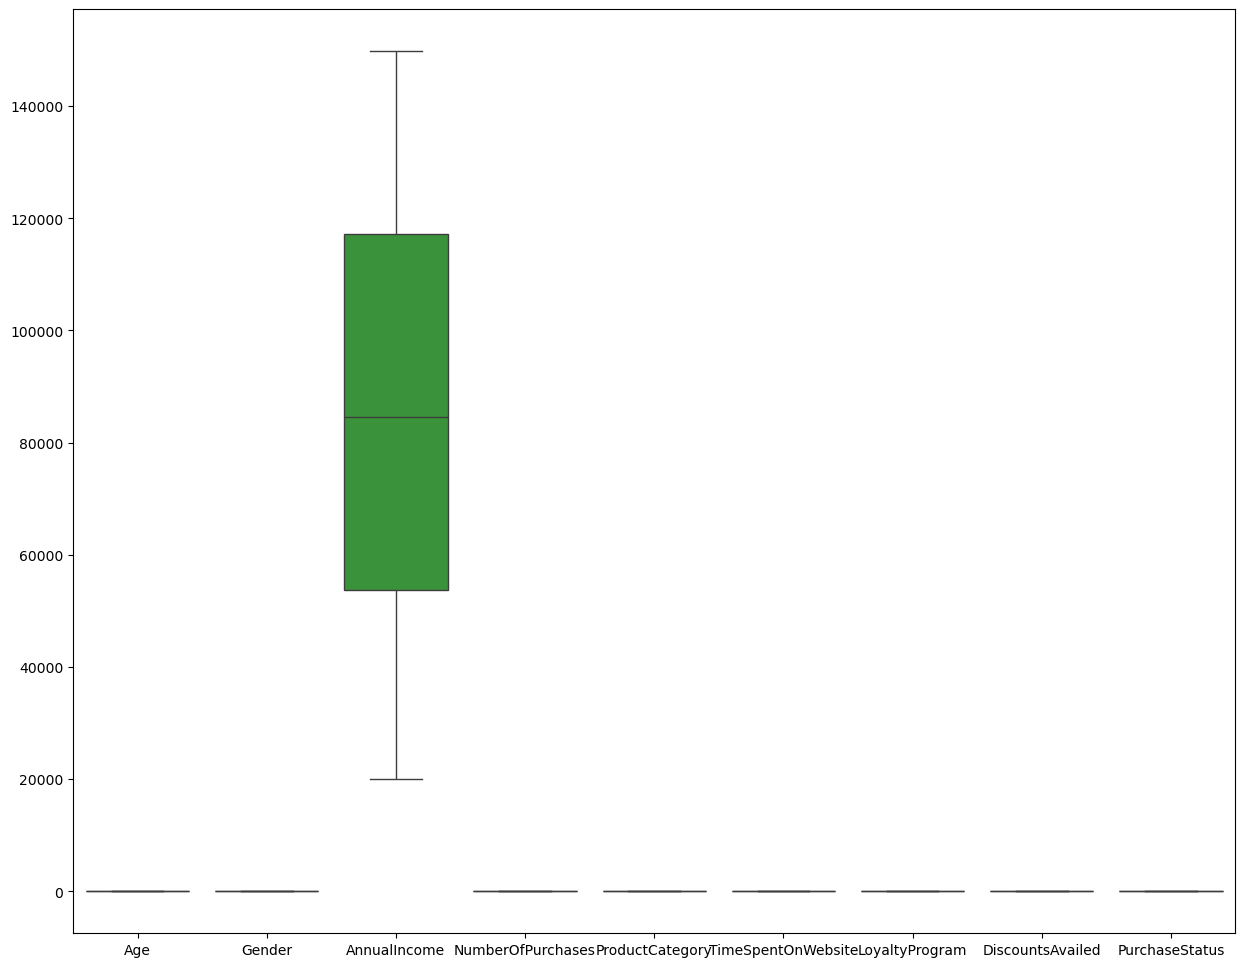

In [32]:
plt.figure(figsize=(15,12)) # Set the Width & Height
sns.boxplot(data=df)

In [33]:
# Detecting Actual Values of Outliers
def detect_outliers_iqr(data):
    outlier_list = []
    
    # Drop missing values
    data = data.dropna()
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3 - q1
    
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data: 
        if (i < lwr_bound or i > upr_bound):
            outlier_list.append(i)
    
    return outlier_list 

# Assuming df is your DataFrame
for i in df:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in", i, "attribute:", outliers)

Outliers in Age attribute: []
Outliers in Gender attribute: []
Outliers in AnnualIncome attribute: []
Outliers in NumberOfPurchases attribute: []
Outliers in ProductCategory attribute: []
Outliers in TimeSpentOnWebsite attribute: []
Outliers in LoyaltyProgram attribute: []
Outliers in DiscountsAvailed attribute: []
Outliers in PurchaseStatus attribute: []


## There are no outliers

# Univarient EDA

In [38]:
def bar_pie_plot(target_variable):
    # Count the occurrences of each gender using Seaborn
    counts = sns.countplot(x=df[target_variable])

    # Extract the counts from the Seaborn plot (just to demonstrate the method)
    counts_data = df[target_variable].value_counts()

    # Create a pie chart using the counts
    plt.figure(figsize=(6, 6))
    plt.pie(counts_data, labels=counts_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f' {target_variable}  Distribution')
    plt.show()

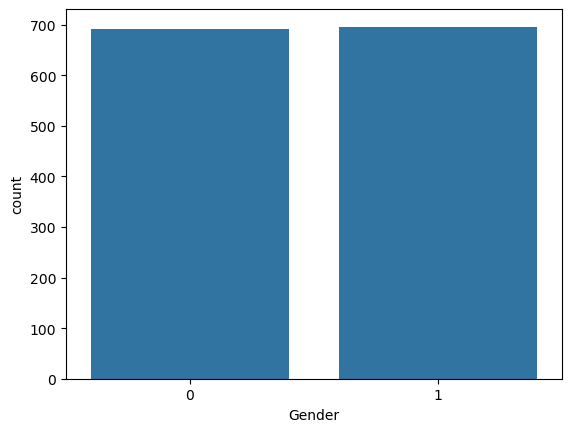

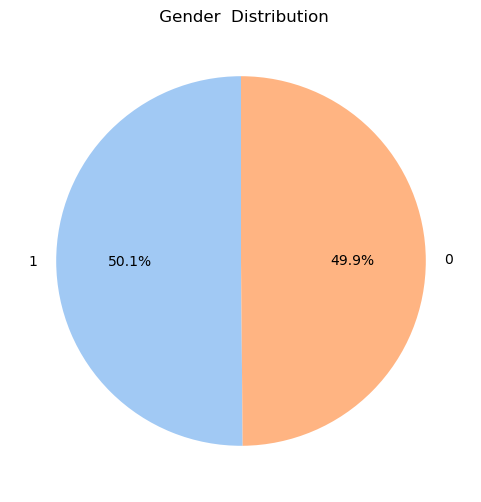

In [40]:
bar_pie_plot('Gender')

## There are eqaual number of Males and females in dataset

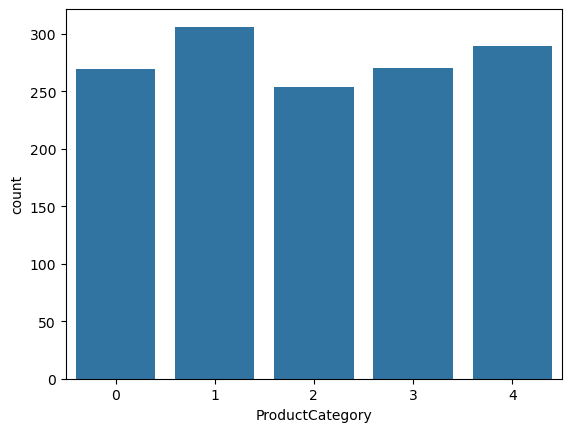

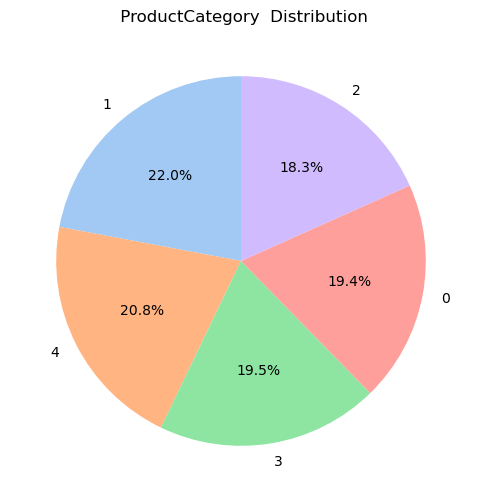

In [42]:
bar_pie_plot('ProductCategory')

## There are more product with category 1

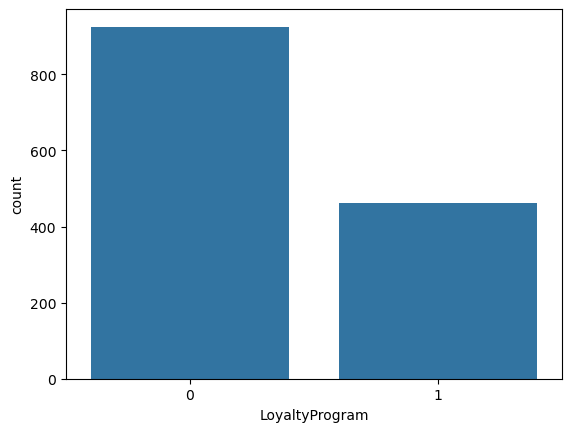

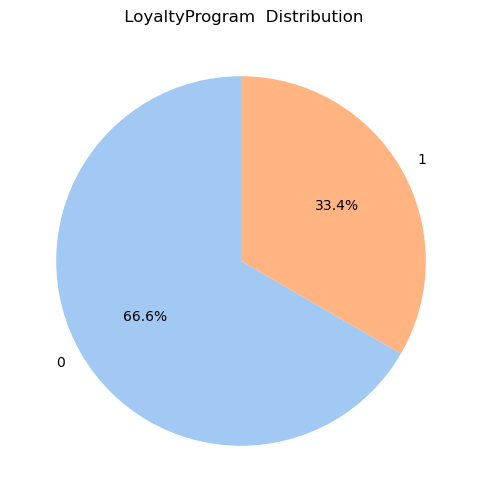

In [44]:
bar_pie_plot('LoyaltyProgram')

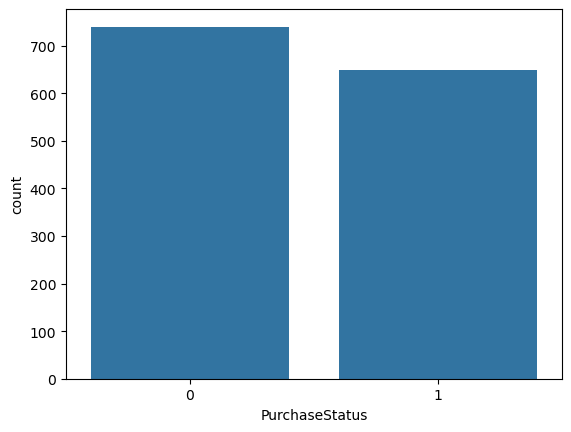

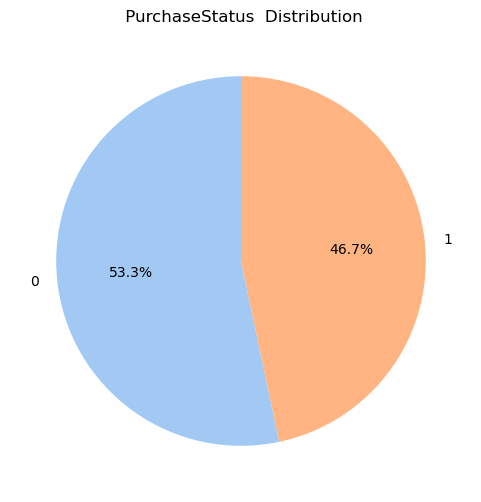

In [46]:
bar_pie_plot('PurchaseStatus')

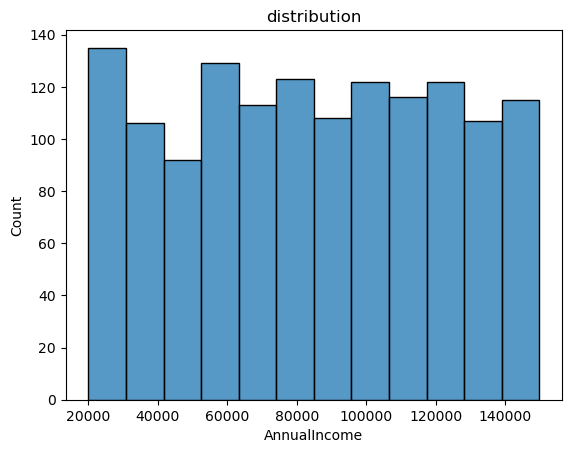

In [47]:
sns.histplot(df.AnnualIncome)
plt.title('distribution')
plt.show()

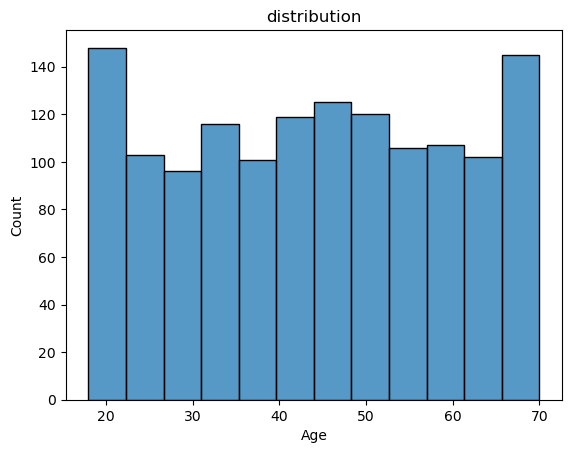

In [49]:
sns.histplot(df.Age)
plt.title('distribution')
plt.show()

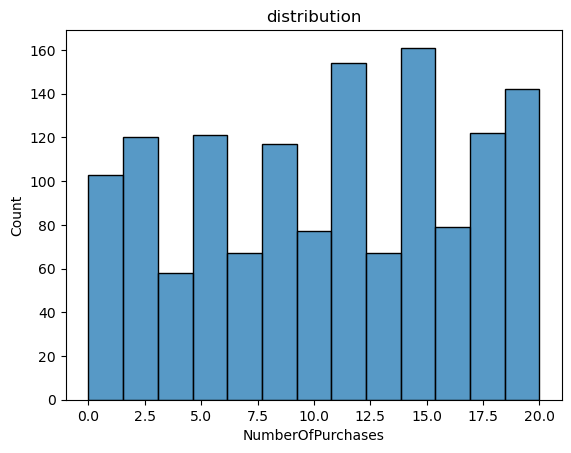

In [51]:
sns.histplot(df.NumberOfPurchases)
plt.title('distribution')
plt.show()

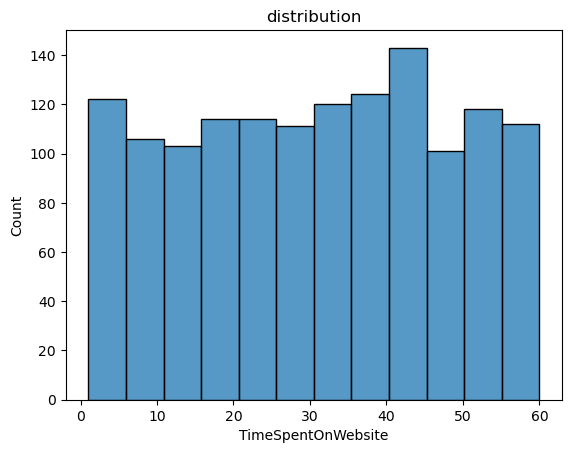

In [53]:
sns.histplot(df.TimeSpentOnWebsite)
plt.title('distribution')
plt.show()

# Bivarient EDA

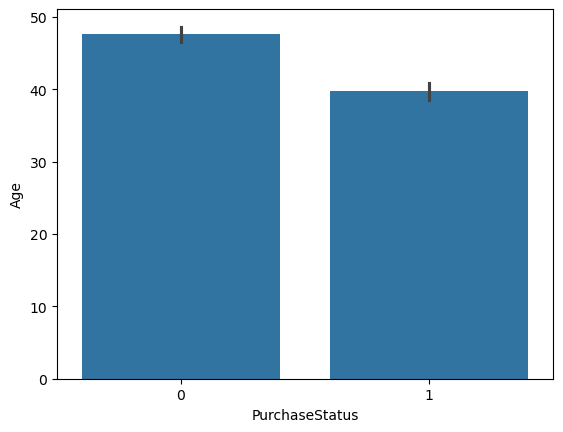

In [57]:
sns.barplot(x='PurchaseStatus', y='Age', data=df)
plt.show()

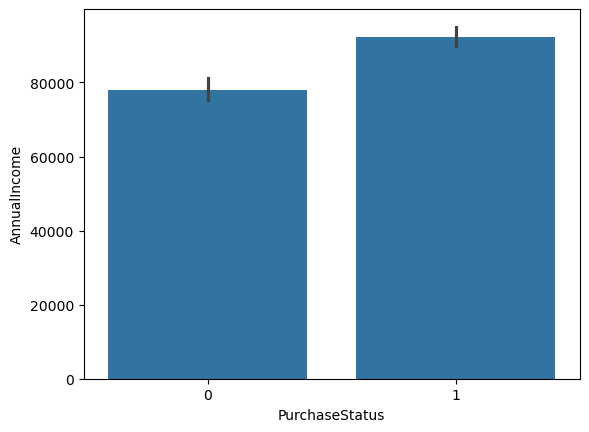

In [59]:
sns.barplot(x='PurchaseStatus', y='AnnualIncome', data=df)
plt.show()

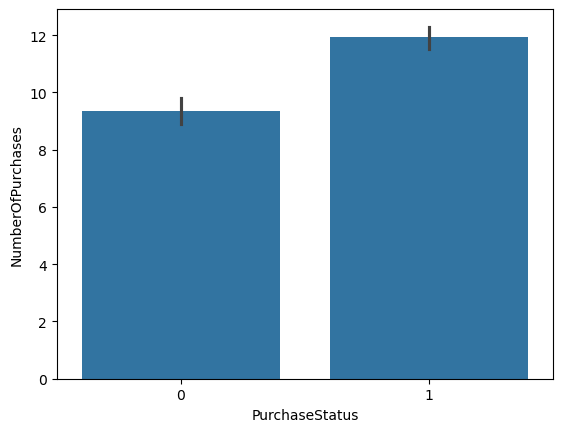

In [61]:
sns.barplot(x='PurchaseStatus', y='NumberOfPurchases', data=df)
plt.show()

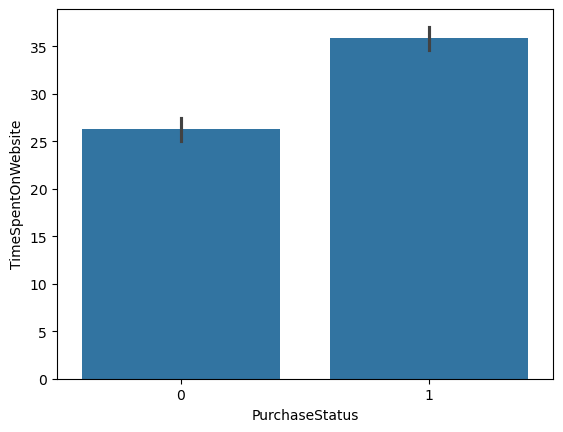

In [63]:
sns.barplot(x='PurchaseStatus', y='TimeSpentOnWebsite', data=df)
plt.show()

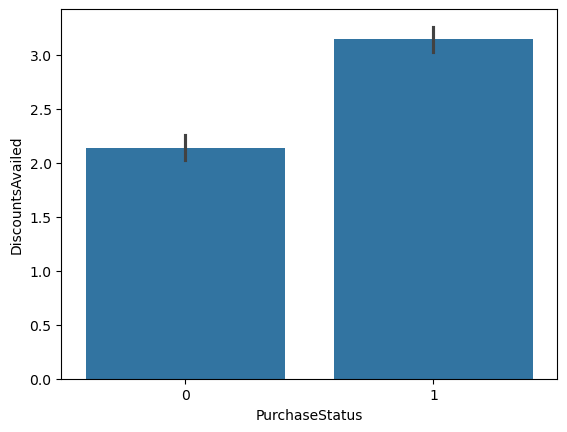

In [65]:
sns.barplot(x='PurchaseStatus', y='DiscountsAvailed', data=df)
plt.show()

# Multivarient EDA

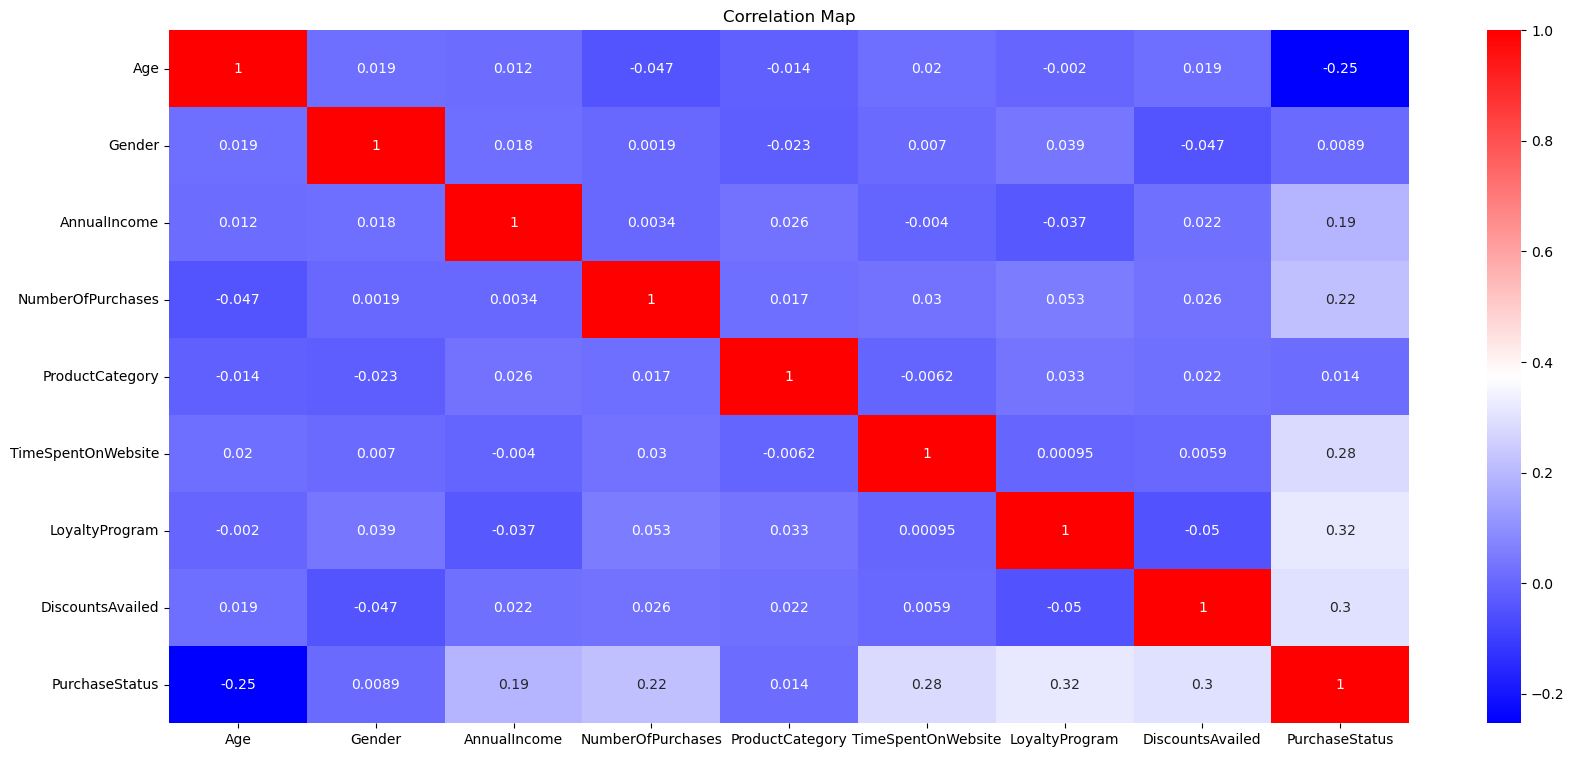

In [133]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True, cmap='bwr')
plt.title("Correlation Map")
plt.show()

## Purchansed total is mostly depends on Discount Availed , Loyalty Program and Time Spend of Website

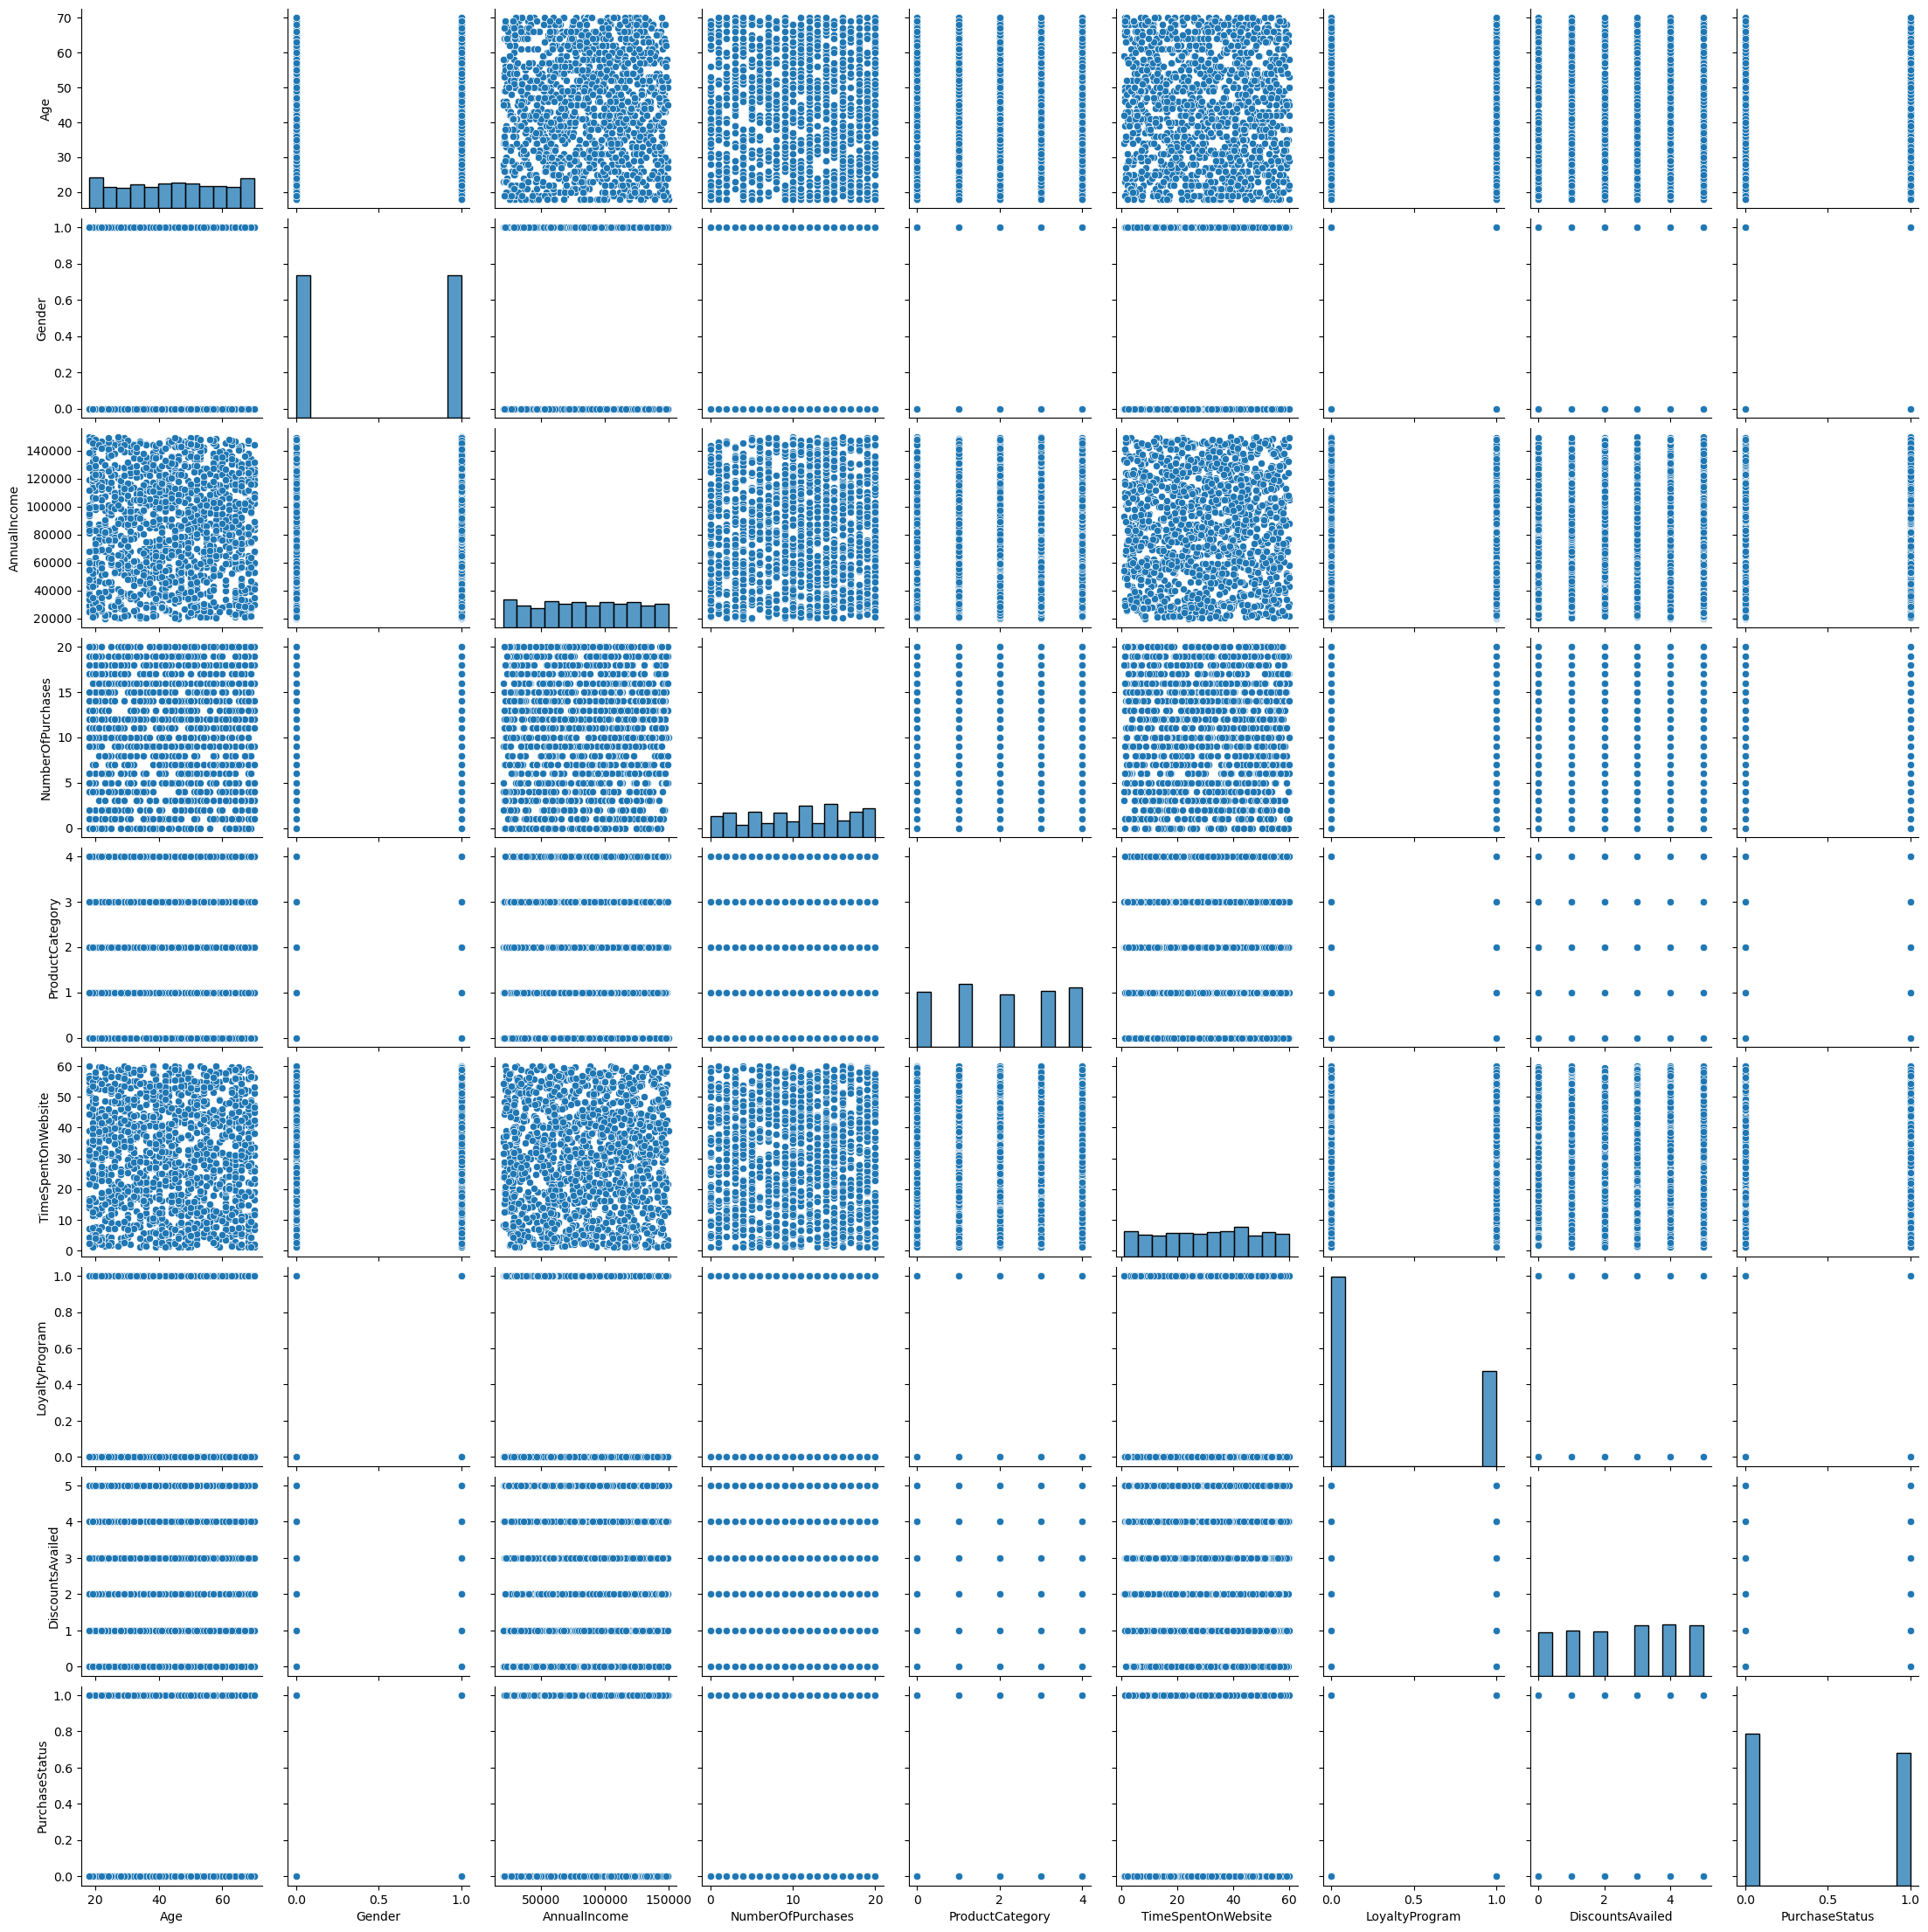

In [70]:
sns.pairplot(df)
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1388 non-null   int64  
 1   Gender              1388 non-null   int64  
 2   AnnualIncome        1388 non-null   float64
 3   NumberOfPurchases   1388 non-null   int64  
 4   ProductCategory     1388 non-null   int64  
 5   TimeSpentOnWebsite  1388 non-null   float64
 6   LoyaltyProgram      1388 non-null   int64  
 7   DiscountsAvailed    1388 non-null   int64  
 8   PurchaseStatus      1388 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 97.7 KB


# Applyling Algorithms

In [125]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [100]:
X = df.drop(columns=['PurchaseStatus'])  # Features
y = df['PurchaseStatus']  # Target variable

In [102]:
# data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying Logistic Regression

In [105]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)


### Applying Decision Tree

In [108]:
# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Fit the model on training data
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test)


### Applying KNN

In [111]:
# Initialize the KNN model
knn = KNeighborsClassifier()

# Fit the model on training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)


### Evaluating Performanace

In [114]:
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Evaluate KNN
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")


Logistic Regression Performance:
Accuracy: 0.7518
Precision: 0.7578
Recall: 0.7518
F1 Score: 0.7520
------------------------------
Decision Tree Performance:
Accuracy: 0.8489
Precision: 0.8489
Recall: 0.8489
F1 Score: 0.8489
------------------------------
K-Nearest Neighbors Performance:
Accuracy: 0.5683
Precision: 0.5693
Recall: 0.5683
F1 Score: 0.5687
------------------------------


# Hyper Parameter Tuning

### Scaling

In [118]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [120]:
# Initialize the model
knn = KNeighborsClassifier()
log_reg = LogisticRegression()

# Fit the model on training data
knn.fit(X_train_scaled, y_train)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn_scaled = knn.predict(X_test_scaled)
y_pred_log_reg_scaled = log_reg.predict(X_test_scaled)

# Evaluate performance
evaluate_model(y_test, y_pred_knn_scaled, "K-Nearest Neighbors (Scaled Data)")
evaluate_model(y_test, y_pred_log_reg_scaled, "Logistic Regression (Scaled Data)")


K-Nearest Neighbors (Scaled Data) Performance:
Accuracy: 0.8273
Precision: 0.8280
Recall: 0.8273
F1 Score: 0.8275
------------------------------
Logistic Regression (Scaled Data) Performance:
Accuracy: 0.8525
Precision: 0.8525
Recall: 0.8525
F1 Score: 0.8525
------------------------------


### By Changing Parameters

In [127]:
dt_params = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train_scaled, y_train)
print("Best Decision Tree Params:", dt_grid.best_params_)


Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [128]:
# Initialize the model with best parameters
best_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=40,
    min_samples_leaf=4,
    min_samples_split=10
)

# Train the model on the scaled training data
best_dt.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_dt_best = best_dt.predict(X_test_scaled)

# Evaluate performance
evaluate_model(y_test, y_pred_dt_best, "Tuned Decision Tree")

Tuned Decision Tree Performance:
Accuracy: 0.8849
Precision: 0.8871
Recall: 0.8849
F1 Score: 0.8843
------------------------------


In [131]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
print("Best KNN Params:", knn_grid.best_params_)


Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [46]:
best_knn = KNeighborsClassifier(
    metric='manhattan',
    n_neighbors=11,
    weights='distance'
)

# Train the model on the scaled training data
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_knn_best = best_knn.predict(X_test_scaled)

# Evaluate performance
evaluate_model(y_test, y_pred_knn_best, "Tuned K-Nearest Neighbors")

Tuned K-Nearest Neighbors Performance:
Accuracy: 0.8597
Precision: 0.8601
Recall: 0.8597
F1 Score: 0.8598
------------------------------
